# Paytm - In Progress

In [1]:
# Load necessary libraries
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
from tqdm.auto import tqdm
tqdm.pandas()

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/paytm/paytm.csv', engine='python')

In [3]:
# Know the shape of the loaded data
df.shape

(1006178, 27)

In [4]:
processor = Processor('./../../data/config.json')

## Data Cleaning

In [5]:
# Declare the list of words for share market tweets
stock_words_list = ['stock', 'stocks', 'share market', 'share', 'market', 'results', 
                    'raising', 'raised', 'raise', 'raises', 'ipo', 'chart', 'watchlist', 'breakout', 
                    'trading', 'trade', 'stop loss', 'stoploss', 'ncd', 'vcp']

In [6]:
# Remove tweets related to stock market
df['is_share_tweet'] = df['tweet'].apply(lambda x: any(word in str(x) for word in stock_words_list))
cleaned_df = df[~df['is_share_tweet']]

In [7]:
cleaned_df.shape

(952524, 28)

## Word Distribution

In [8]:
words = ["harassment", "fraud", "restructure", "covid19 relief", "force", "money cut", "unethical", "fake", "false promise", "shutdown",
         "moratorium", "no response", "scam", "no answer", "love", "responsive", "very bad", "machine learning", "algorithm", "delay", 
         "leveraging"]

In [9]:
pre_df = cleaned_df[cleaned_df['date'] < '2020-02-01']
post_df = cleaned_df[cleaned_df['date'] >= '2020-02-01']

In [10]:
pre_result = processor.words_distribution(pre_df, words)

100%|██████████| 21/21 [5:39:54<00:00, 971.15s/it]


In [11]:
pre_result.to_csv('./../../data/fintech/paytm/pre_wd.csv', index=False)

In [12]:
post_result = processor.words_distribution(post_df, words)

100%|██████████| 21/21 [5:45:23<00:00, 986.83s/it]


In [13]:
post_result.to_csv('./../../data/fintech/paytm/post_wd.csv', index=False)

In [14]:
pre_result

,words,false_cnt,true_cnt,false_percent,true_percent
0,harassment,473296,244,99.948473,0.051527
1,fraud,454231,19309,95.922414,4.077586
2,restructure,473527,13,99.997255,0.002745
3,covid19 relief,473540,0,100.000000,0.000000
4,force,470747,2793,99.410187,0.589813
5,money cut,473529,11,99.997677,0.002323
6,unethical,473341,199,99.957976,0.042024
7,fake,463769,9771,97.936605,2.063395
8,false promise,473432,108,99.977193,0.022807
9,shutdown,473464,76,99.983951,0.016049


In [15]:
post_result

,words,false_cnt,true_cnt,false_percent,true_percent
0,harassment,478728,176,99.963249,0.036751
1,fraud,462496,16408,96.573844,3.426156
2,restructure,478900,4,99.999165,0.000835
3,covid19 relief,478901,3,99.999374,0.000626
4,force,477496,1408,99.705995,0.294005
5,money cut,478893,11,99.997703,0.002297
6,unethical,478724,180,99.962414,0.037586
7,fake,469899,9005,98.119665,1.880335
8,false promise,478855,49,99.989768,0.010232
9,shutdown,478835,69,99.985592,0.014408


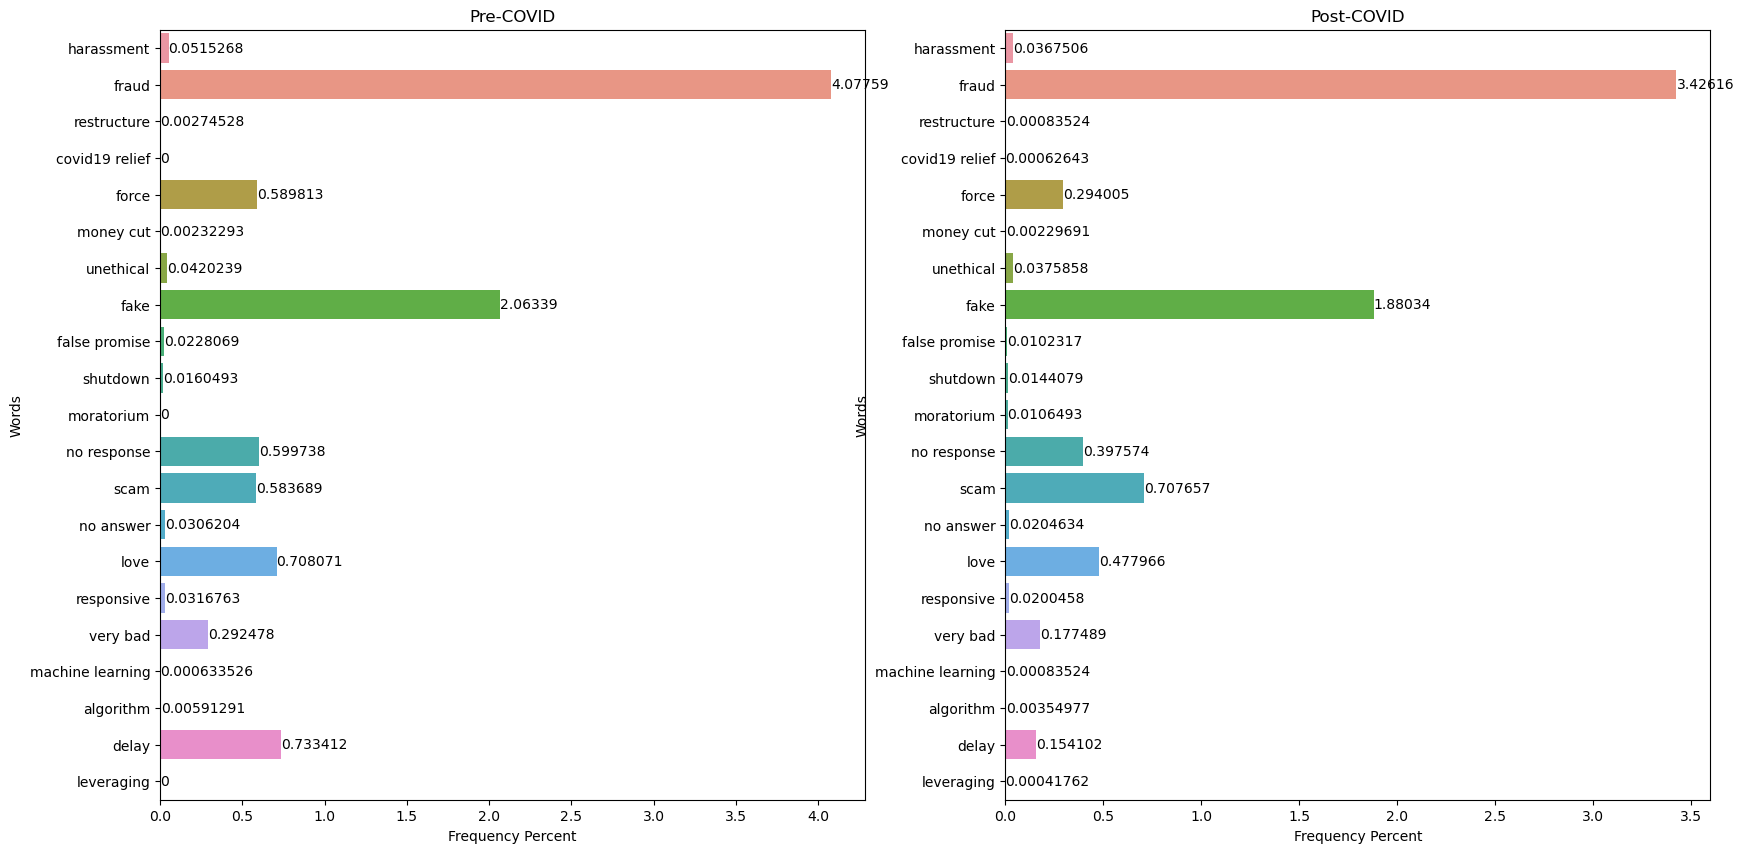

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='true_percent', y='words', data=pre_result, orient='h', ax=axes[0])
axes[0].set(xlabel='Frequency Percent', ylabel='Words', title='Pre-COVID')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.barplot(x='true_percent', y='words', data=post_result, orient='h', ax=axes[1])
axes[1].set(xlabel='Frequency Percent', ylabel='Words', title='Post-COVID')
for i in axes[1].containers:
    axes[1].bar_label(i,)

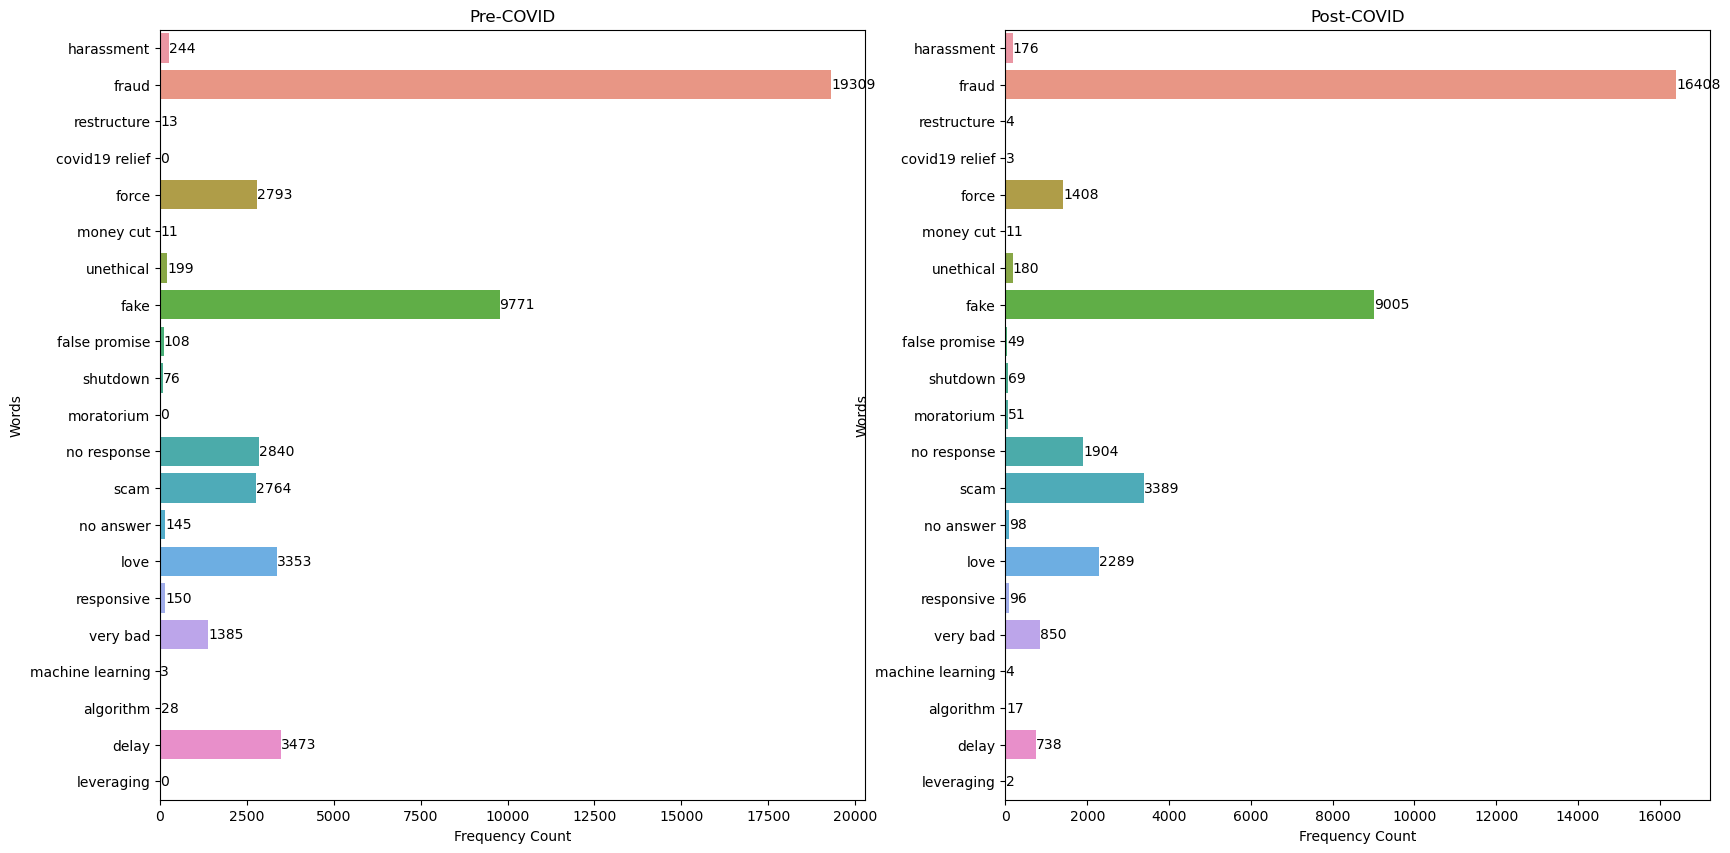

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='true_cnt', y='words', data=pre_result, orient='h', ax=axes[0])
axes[0].set(xlabel='Frequency Count', ylabel='Words', title='Pre-COVID')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.barplot(x='true_cnt', y='words', data=post_result, orient='h', ax=axes[1])
axes[1].set(xlabel='Frequency Count', ylabel='Words', title='Post-COVID')
for i in axes[1].containers:
    axes[1].bar_label(i,)